# Open University Student Outcome Predictions
Aim : analyse student data to highlight features that contribute to student success or failure and build categorical prediction model to identify a student's likely outcome

In [190]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
stud_info = pd.read_csv("./anonymisedData/studentInfo.csv")
stud_interaction = pd.read_csv("./anonymisedData/vle.csv")
interaction = pd.read_csv("./anonymisedData/studentVle.csv")

In [105]:
stud_info.set_index('id_student')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
id_student,,,,,,,,,,,
11391,AAA,2013J,0,East Anglian Region,3,95.0,2,0,240,0,Pass
28400,AAA,2013J,1,Scotland,3,25.0,1,0,60,0,Pass
30268,AAA,2013J,1,North Western Region,2,35.0,1,0,60,1,Withdrawn
31604,AAA,2013J,1,South East Region,2,55.0,1,0,60,0,Pass
32885,AAA,2013J,1,West Midlands Region,1,55.0,0,0,60,0,Pass
38053,AAA,2013J,0,Wales,2,85.0,1,0,60,0,Pass
45462,AAA,2013J,0,Scotland,3,35.0,0,0,60,0,Pass
45642,AAA,2013J,1,North Western Region,2,95.0,0,0,120,0,Pass
52130,AAA,2013J,1,East Anglian Region,2,75.0,0,0,90,0,Pass


In [114]:
print(stud_info.shape)
stud_info.head()

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,0,East Anglian Region,3,95.0,2,0,240,0,Pass
1,AAA,2013J,28400,1,Scotland,3,25.0,1,0,60,0,Pass
2,AAA,2013J,30268,1,North Western Region,2,35.0,1,0,60,1,Withdrawn
3,AAA,2013J,31604,1,South East Region,2,55.0,1,0,60,0,Pass
4,AAA,2013J,32885,1,West Midlands Region,1,55.0,0,0,60,0,Pass


In [4]:
print(stud_info['id_student'].count() - stud_info['id_student'].nunique())

3808


In [5]:
stud_info.dtypes

code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

In [6]:
stud_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [7]:
print(stud_info['highest_education'].value_counts())
print('\n')
print(stud_info['imd_band'].value_counts())
print('\n')
print(stud_info['age_band'].value_counts()) 
print('\n')
print(stud_info['num_of_prev_attempts'].value_counts())
print('\n')
print(stud_info['disability'].value_counts())
print('\n')
print(stud_info['final_result'].value_counts())
print('\n')
print(stud_info['imd_band'].value_counts())

A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64


20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64


0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64


0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64


N    29429
Y     3164
Name: disability, dtype: int64


Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64


# Dummy variables and data encoding

In [8]:
stud_info.replace(['M', 'F'], [0, 1], inplace = True)

In [9]:
stud_info.replace(['N', 'Y'], [0, 1], inplace = True)

In [10]:
stud_info.replace(['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent', 
                   'HE Qualification', 'Post Graduate Qualification'], [0, 1, 2, 3, 4], inplace = True)

In [11]:
stud_info.replace(['0-35', '35-55', '55<='], [0, 1, 2], inplace = True)

In [12]:
stud_info.replace(['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', 
                   '60-70%', '70-80%', '80-90%', '90-100%'], 
                  [5, 15, 25, 35, 45, 55, 65, 75, 85, 95], inplace = True)

In [13]:
stud_info.imd_band.fillna(stud_info.imd_band.median(), inplace=True)

In [14]:
stud_info.describe()

,id_student,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability
count,3.259300e+04,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000
mean,7.066877e+05,0.451569,1.739331,47.043384,0.302672,0.163225,79.758691,0.097076
std,5.491673e+05,0.497657,0.749598,27.677059,0.473628,0.479758,41.071900,0.296066
min,3.733000e+03,0.000000,0.000000,5.000000,0.000000,0.000000,30.000000,0.000000
25%,5.085730e+05,0.000000,1.000000,25.000000,0.000000,0.000000,60.000000,0.000000
50%,5.903100e+05,0.000000,2.000000,45.000000,0.000000,0.000000,60.000000,0.000000
75%,6.444530e+05,1.000000,2.000000,75.000000,1.000000,0.000000,120.000000,0.000000
max,2.716795e+06,1.000000,4.000000,95.000000,2.000000,6.000000,655.000000,1.000000


In [15]:
stud_info.imd_band.fillna(stud_info.imd_band.median(), inplace=True)

In [162]:
stud_info['numerical_result'] = stud_info.final_result.replace(['Fail', 'Withdrawn', 'Pass', 'Distinction'], [0, 1, 2, 3], inplace = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x116d4eb70>,
      dtype=object)

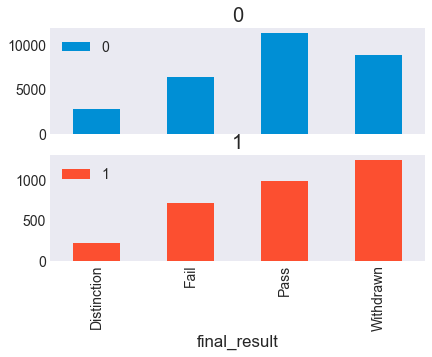

In [211]:
pd.crosstab(stud_info['final_result'], stud_info['disability']).plot(kind = 'bar', subplots = True)

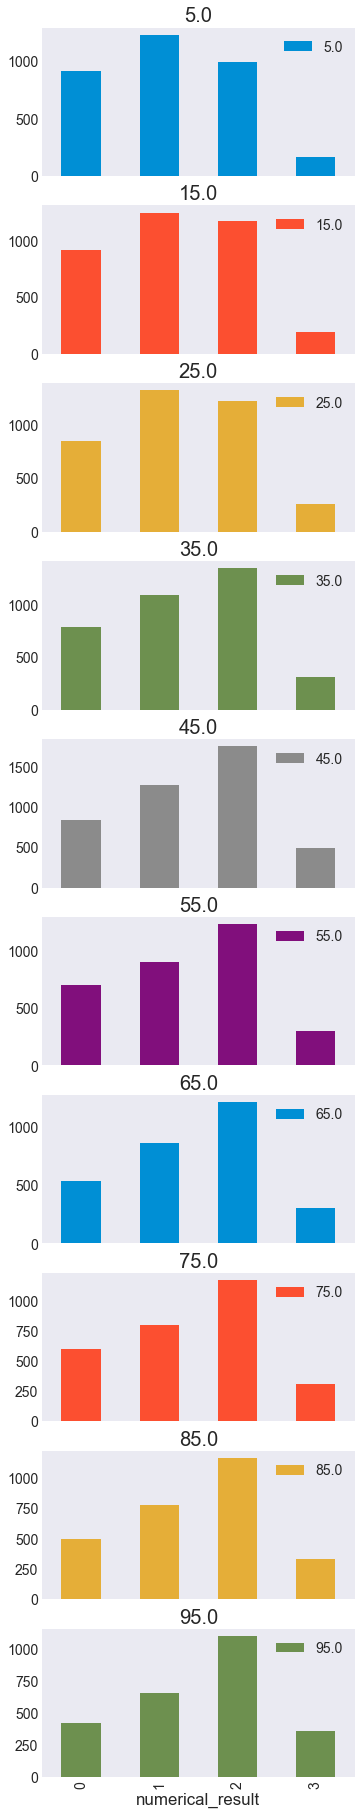

In [212]:
pd.crosstab(stud_info['numerical_result'], stud_info['imd_band']).plot(kind = 'bar', subplots = True, figsize = [5,30]);

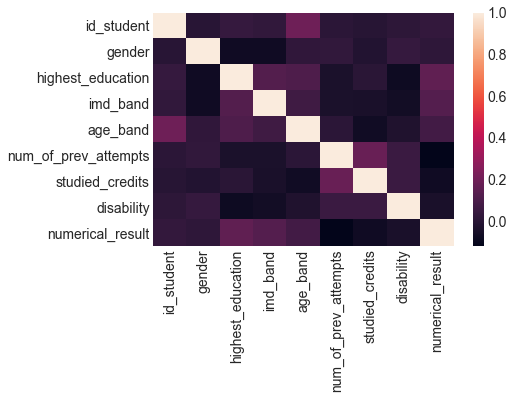

In [198]:
import seaborn as sns
sns.set_style("dark")
sns.heatmap(stud_info.corr());

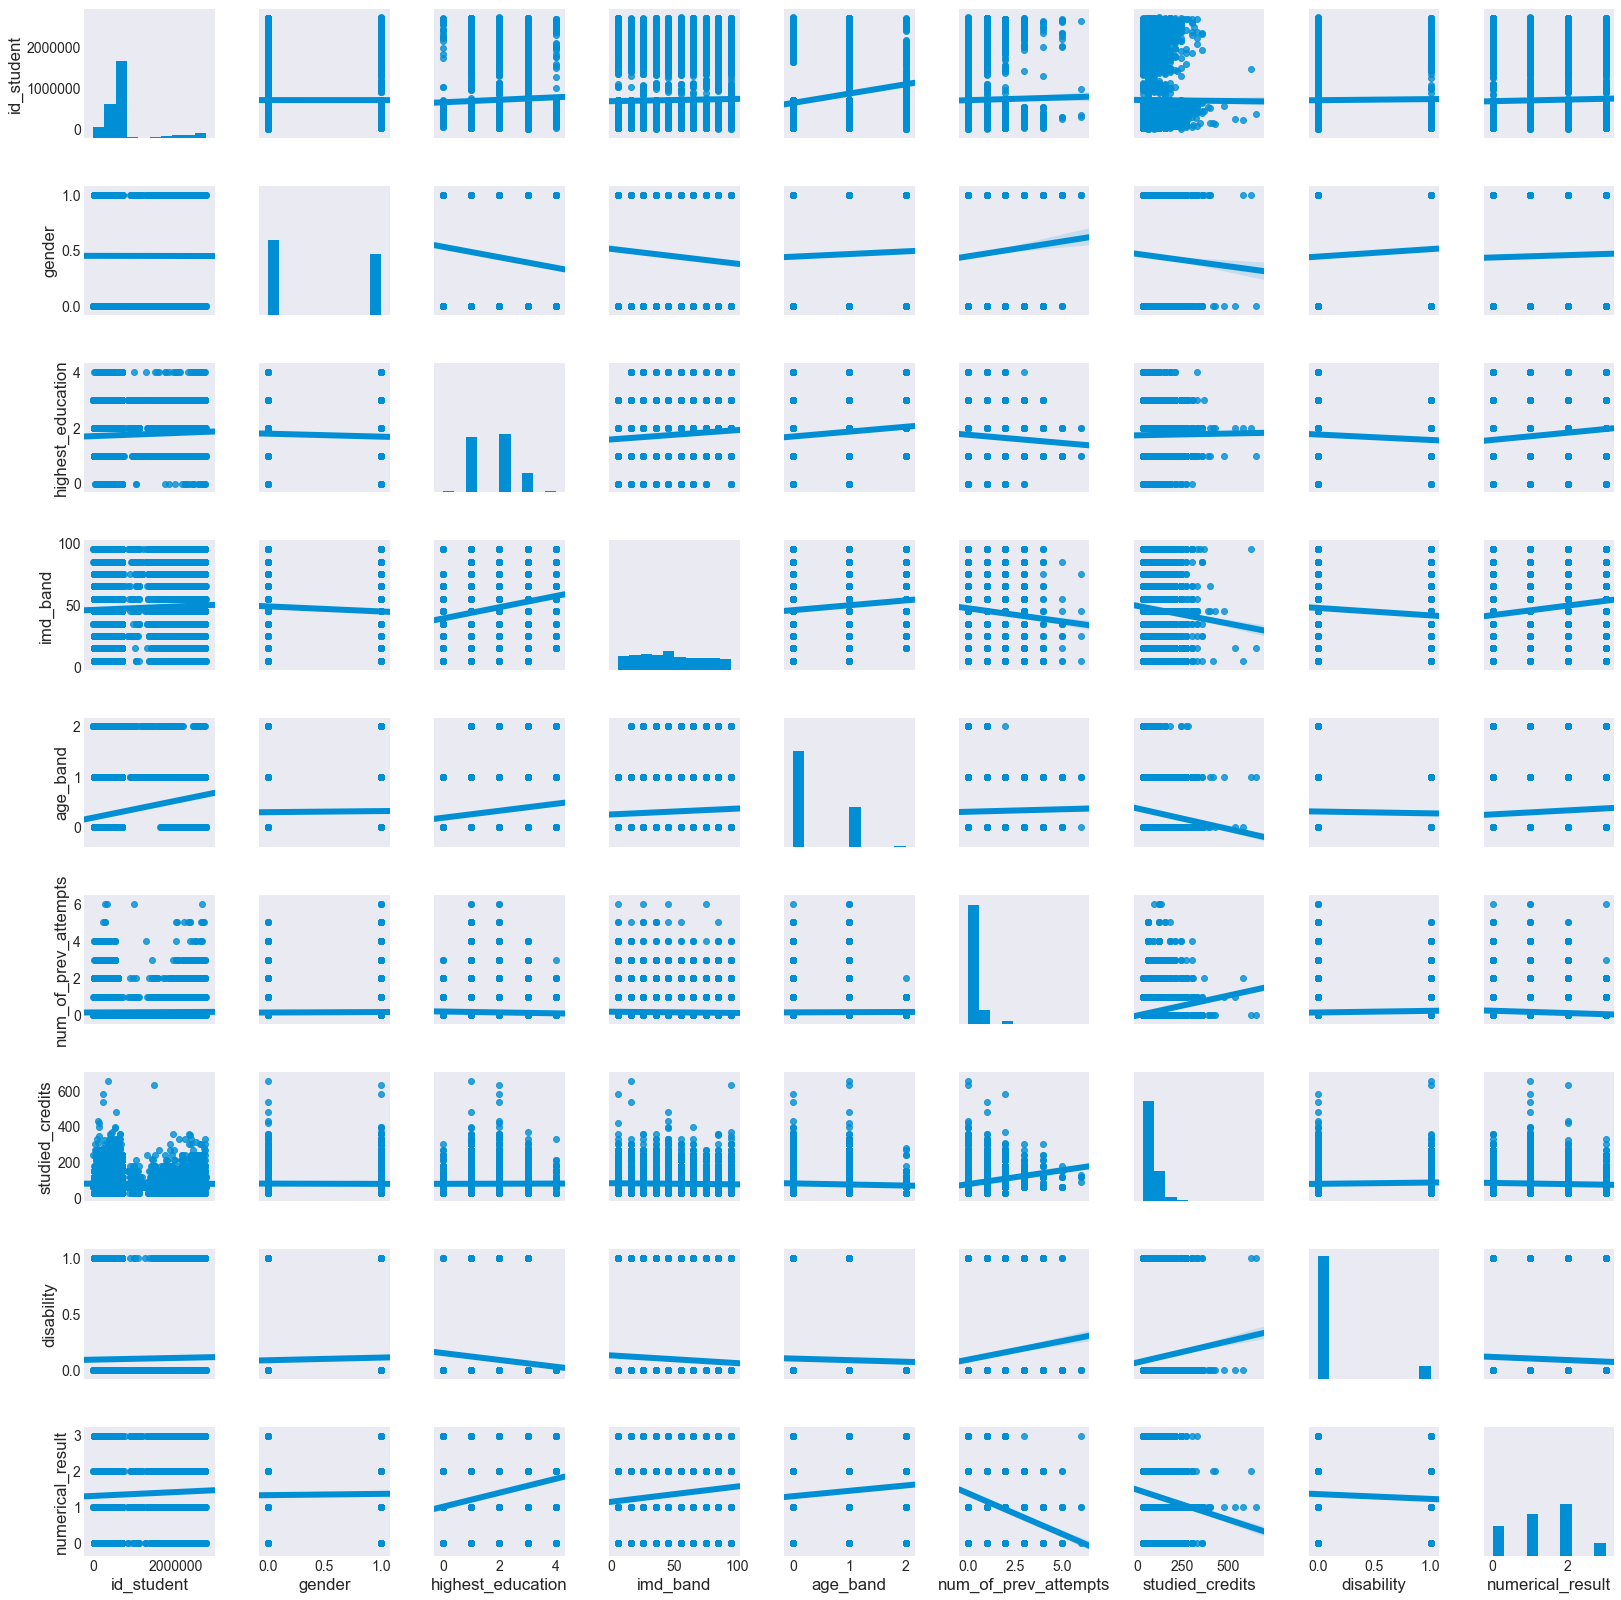

In [200]:
sns.pairplot(stud_info, kind="reg")

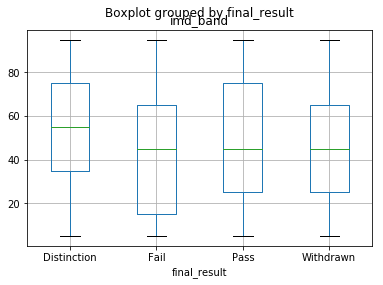

In [19]:
stud_info.boxplot(column='imd_band', by='final_result');


Integrated vle.csv which has data for students' interactions with online learning materials

In [20]:
interaction.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


Comparing number of rows with number of unique student ids shows that there are multiple records of clicks for each student. In order to create a summarizing statistic of interaction for each student, all their individual records have been summed

In [269]:
interaction.shape

(10655280, 7)

In [99]:
interaction.id_student.nunique()

26074

In [100]:
interaction_clicks = pd.DataFrame(interaction.groupby('id_student').sum_click.sum())

In [214]:
interaction_clicks.head()

,sum_click
id_student,
6516,2791
8462,656
11391,934
23629,161
23698,910


In [219]:
info_clicks = pd.DataFrame(stud_info.merge(interaction_clicks, on = 'id_student'))
info_clicks.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,numerical_result,sum_click
0,AAA,2013J,11391,0,East Anglian Region,3,95.0,2,0,240,0,Pass,2,934
1,AAA,2013J,28400,1,Scotland,3,25.0,1,0,60,0,Pass,2,1435
2,AAA,2013J,30268,1,North Western Region,2,35.0,1,0,60,1,Withdrawn,1,281
3,AAA,2013J,31604,1,South East Region,2,55.0,1,0,60,0,Pass,2,2158
4,AAA,2013J,32885,1,West Midlands Region,1,55.0,0,0,60,0,Pass,2,1034


Mean click value highlights vast difference between interactions and results

In [225]:
info_clicks.groupby(info_clicks.final_result).sum_click.mean()

final_result
Distinction    3106.433201
Fail            833.788213
Pass           2171.110374
Withdrawn       835.010079
Name: sum_click, dtype: float64

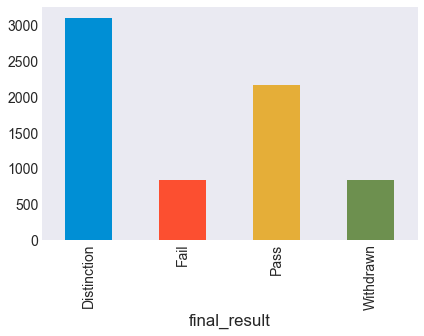

In [226]:
info_clicks.groupby(info_clicks.final_result).sum_click.mean().plot(kind = 'bar')

In [227]:
info_clicks.groupby(info_clicks.final_result).sum_click.sum()

final_result
Distinction     9393854
Fail            5602223
Pass           26830582
Withdrawn       6379477
Name: sum_click, dtype: int64

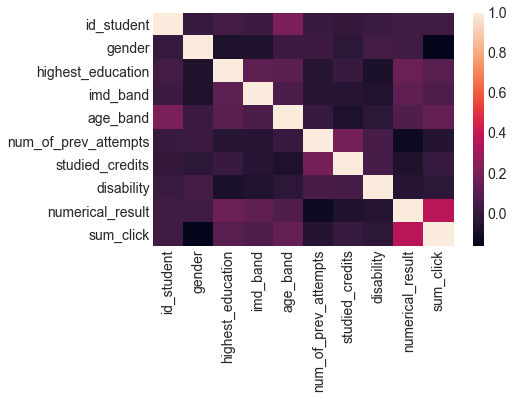

In [228]:
sns.heatmap(info_clicks.corr());

# Decision Tree Classifier

In [290]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

features = ['highest_education', 'age_band', 'imd_band', 'studied_credits']

X = stud_info[features]
y = stud_info.final_result

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tree = DecisionTreeClassifier(random_state=1, max_depth = 4)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [291]:
predictions = pd.DataFrame(data = y_pred, columns = ['prediction'], index = range(0,(len(y_pred))))

In [292]:
predictions.prediction.value_counts()

Pass         5657
Withdrawn    2492
Name: prediction, dtype: int64

In [293]:
f1_score(y_test, y_pred, average= 'micro')

0.4301141244324457

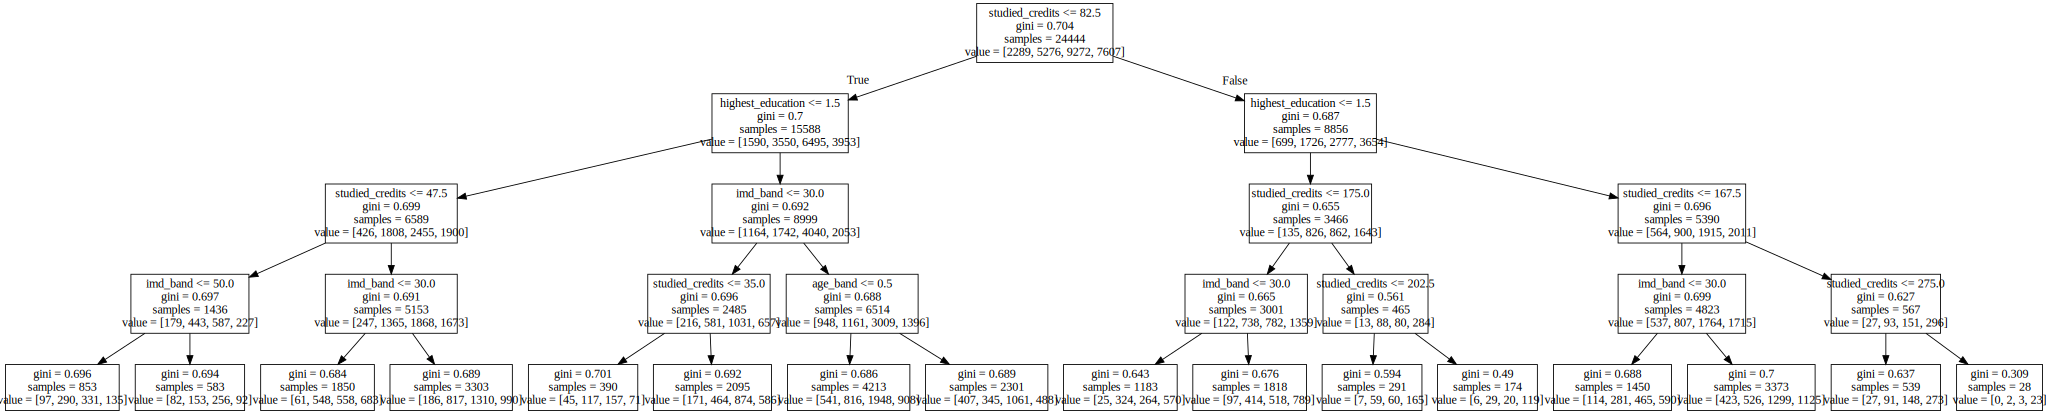

In [274]:
import graphviz 
from sklearn.tree import export_graphviz

viz_data = export_graphviz(tree, feature_names=features, out_file = None)

graph = graphviz.Source(viz_data, filename = './graph', format = 'png')  
graph

In [294]:
pd.DataFrame({'feature':features, 'importance':tree.feature_importances_})

,feature,importance
0,highest_education,0.276580
1,age_band,0.012394
2,imd_band,0.123355
3,studied_credits,0.587671


Rebuilding the model using sum_clicks increases the model results

In [298]:
features = ['highest_education', 'age_band', 'imd_band', 'sum_click']

X = info_clicks[features]
y = info_clicks.final_result

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tree = DecisionTreeClassifier(random_state=1, max_depth = 5)

tree.fit(X_train, y_train)

y_pred_clicks = tree.predict(X_test)

In [285]:
click_predictions = pd.DataFrame(data = y_pred_clicks, columns = ['prediction'], index = range(0,(len(y_pred_clicks))))

In [286]:
click_predictions.prediction.value_counts()

Pass         5549
Withdrawn    1622
Fail          265
Name: prediction, dtype: int64

In [287]:
f1_score(y_test, y_pred_clicks, average= 'micro')

0.5133136094674556

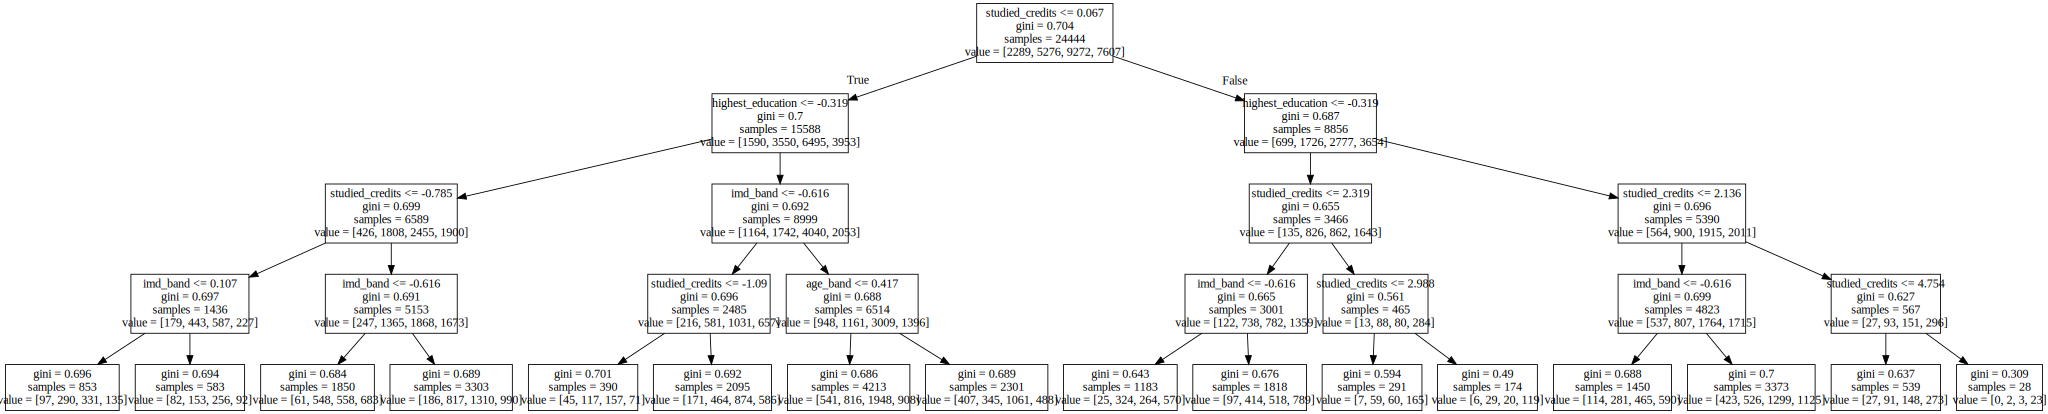

In [295]:
import graphviz 
from sklearn.tree import export_graphviz

viz_data = export_graphviz(tree, out_file=None, feature_names=features)

graph = graphviz.Source(viz_data)  
graph

In [289]:
pd.DataFrame({'feature':features, 'importance':tree.feature_importances_})

,feature,importance
0,highest_education,0.034503
1,age_band,0.003583
2,imd_band,0.014936
3,sum_click,0.946978


# KNN Classification

In [299]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [300]:
f1_score(y_test, knn_pred, average= 'micro')

0.407477138246369

# Log Reg

In [301]:
from sklearn.linear_model import LogisticRegression

features = ['highest_education', 'num_of_prev_attempts', 'imd_band', 'sum_click']

X = info_clicks[features]
y = info_clicks.final_result

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)
logregmodel = LogisticRegression(random_state = 0, class_weight = 'balanced')


logregmodel.fit(X_train,y_train)
pred = logregmodel.predict(X_test)

In [302]:
logregpred = pd.DataFrame(data = pred, columns = ['grade'], index = range(0,(len(pred))))

In [303]:
logregpred.grade.value_counts()

Withdrawn      2562
Pass           2541
Fail            583
Distinction     263
Name: grade, dtype: int64

In [304]:
f1_score(y_test, pred, average = 'micro')

0.47335686670028576